In [1]:
import os
import cv2
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from xml.dom import minidom
from svg.path import parse_path
from svg.path.path import Line

In [2]:
def svg2array(svg_path, max_size):
    """ Função que recebe o caminho para um arquivo svg com um desenho produzido a partir de uma única linha e retorna uma 
    lista com as coordenadas dos pontos pertencentes à linha que forma o desenho.
    """
    
    # Extrai path_strings do arquivo svg
    doc = minidom.parse(svg_path)
    path_strings = [path.getAttribute('d') for path in doc.getElementsByTagName('path')]
    doc.unlink()
    
    # Usa a biblioteca svg.path para extrair as coordenadas dos pontos do desenho
    path = parse_path(path_strings[0])
    points = np.zeros( (len(path)+1, 2) )
    for i, e in enumerate(path):
        points[i] = np.array([e.start.real, e.start.imag])
        if i == len(path)-1:
            points[i+1] = np.array([e.end.real, e.end.imag])
    
    # Realiza uma translação para centralizar o desenho na imagem
    offset_x = (np.min(points[:,0]) + np.max(points[:,0])) // 2
    offset_y = (np.min(points[:,1]) + np.max(points[:,1])) // 2
    offset = np.reshape( np.array([offset_x, offset_y]), (1, 2))
    points -= offset
    
    # Reescala o desenho
    points = points * ( (3*max_size // 8) / np.max(points) ) + max_size // 2
    
    # Arredonda para que os pontos assumam valores inteiros
    points = np.array( np.around(points), dtype="uint16" )
    
    return points

Image 1: 1702 points
Y values between 34 and 224
X values between 43 and 214
P0 = [178 214]
P1702 = [178 214]


Image 2: 1348 points
Y values between 36 and 224
X values between 35 and 223
P0 = [132  36]
P1348 = [132  36]


Image 3: 3258 points
Y values between 33 and 224
X values between 49 and 207
P0 = [118 190]
P3258 = [118 190]




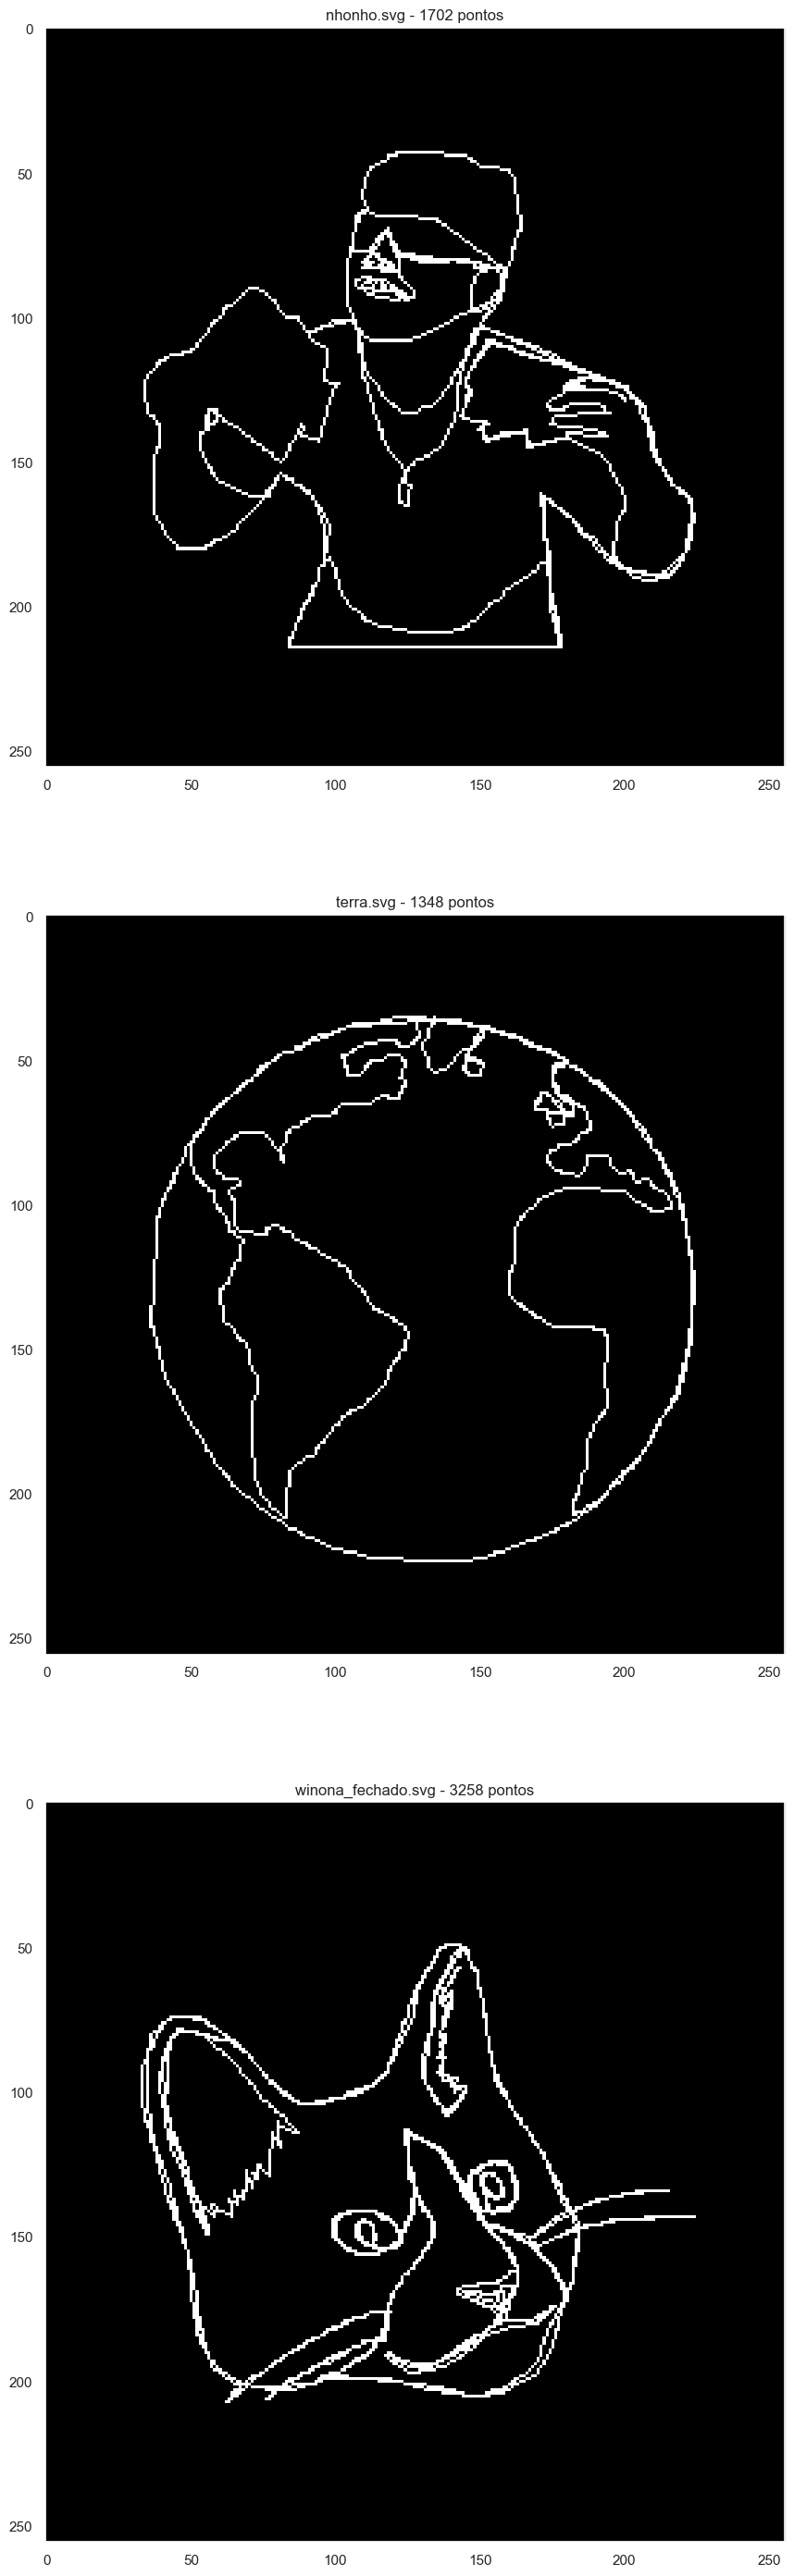

In [3]:
img_size = 256
line_thickness = 1
draw_paths = glob.glob(os.path.join(".", "drawings", "*.svg"))

n_plots = len(draw_paths)
fig, axs = plt.subplots(n_plots, 1, figsize=(16, 12 * n_plots), dpi=100)

for idx, (svg_path, ax) in enumerate(zip(draw_paths, axs.flatten())):
    
    points = svg2array(svg_path, img_size)
    n_points = points.shape[0]
    
    print("Image {}: {} points".format(idx+1, n_points))
    print("Y values between {} and {}".format(np.min(points[:,0]), np.max(points[:,0])))
    print("X values between {} and {}".format(np.min(points[:,1]), np.max(points[:,1])))
    print("P0 = {}".format(points[0]))
    print("P{} = {}".format(n_points, points[-1]))
    print("\n")
    
    # Desenha a figura
    canvas = np.zeros((img_size,img_size), dtype="float32")
    for i in range(1, int(1*n_points)):
        cv2.line(canvas, (points[i-1, 0], points[i-1, 1]), (points[i, 0], points[i, 1]), 1, thickness=line_thickness)
        
    ax.imshow(canvas, cmap="gray", vmin=0, vmax=1)
    ax.set_title("{} - {} pontos".format(os.path.basename(svg_path), n_points))
    ax.grid(False)